In [6]:
import numpy as np
from bilderGenerator import zieheBilder
import matplotlib.pyplot as plt

In [99]:
test = zieheBilder(50)
train = zieheBilder(500)

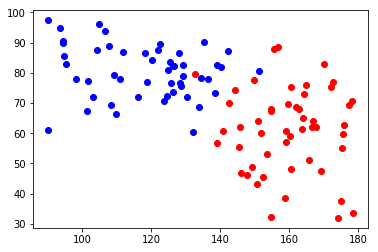

In [128]:
%matplotlib inline
plt.close('all')
colors = ['red','blue','red']
for i in range(len(test[0])):
    plt.plot(test[0][i], test[1][i],'ro', color= colors[test[2][i]])

In [129]:
w1 = 0.0001
w2 = -0.0002
b = 0.001
def y(x1,x2):
    return w1 *x1 +w2 *x2 +b

In [141]:
def print_acc():
    global w1,w2,b,a
    test_y = []
    train_y = []
    for i in range(len(test[0])):
        test_y.append(y(test[0][i],test[1][i]))
    for i in range(len(train[0])):
        train_y.append(y(train[0][i],train[1][i]))
    train_y = np.array(train_y)>0
    test_y = np.array(test_y)>0
    test_bool = test[2] == 1
    train_bool = train[2] == 1
    train_acc = train_y == train_bool
    test_acc = test_y == test_bool
    train_acc = np.mean(train_acc)
    test_acc = np.mean(test_acc)
    print("Train Score",str(train_acc))
    print("Test Score",str(test_acc))
    return train_acc,test_acc

In [142]:
print_acc()

Train Score 0.852
Test Score 0.83


(0.852, 0.83)

In [105]:
def l(x1,x2):
    return (w1 *x1 +w2 *x2 +b -t)**2
def lw1(x1,x2):
    return 2*(w1 *x1 +w2 *x2 +b -t)*x1
def lw2(x1,x2):
    return 2*(w1 *x1 +w2 *x2 +b-t)*x2
def lb(x1,x2):
    return 2*(w1 *x1 +w2 *x2 +b-t)

In [132]:
w1 = 0.0001
w2 = -0.0002
b = 0.001
a = 0.0000005
def train_data():
    global w1,w2,b,a,t
    for i,x in enumerate(train[0]):
        _y =train[1][i]
        predict_label = y(x,_y) >0
        label = train[2][i]==1
        t = train[2][i]
        if not predict_label==label:
            w1_neu = w1 - a*lw1(x,_y)
            w2_neu = w2 - a*lw2(x,_y)
            b_neu = b - a*lb(x,_y)
            w1 = w1_neu
            w2 = w2_neu
            b = b_neu
train_data()

In [133]:
print_acc()

Train Score 0.803
Test Score 0.8


In [143]:
w1 = np.random.normal(0,0.001)
w2 = np.random.normal(0,0.001)
b = np.random.normal(0,0.001)
# Wir beobachten eine hohe Genauigkeit
print(w1,w2,b)
acc = []
for x in range(100):
    train_data()
    acc.append(print_acc())
# Nach der ersten Epoche sinkt die Genauigkeit teilweise....

0.00031787397627118454 0.0022030884998351517 0.00047748130092281393
Train Score 0.841
Test Score 0.82
Train Score 0.842
Test Score 0.82
Train Score 0.847
Test Score 0.82
Train Score 0.847
Test Score 0.82
Train Score 0.844
Test Score 0.82
Train Score 0.844
Test Score 0.82
Train Score 0.847
Test Score 0.82
Train Score 0.847
Test Score 0.82
Train Score 0.847
Test Score 0.82
Train Score 0.847
Test Score 0.82
Train Score 0.847
Test Score 0.82
Train Score 0.853
Test Score 0.83
Train Score 0.852
Test Score 0.83
Train Score 0.853
Test Score 0.83
Train Score 0.853
Test Score 0.83
Train Score 0.853
Test Score 0.83
Train Score 0.853
Test Score 0.83
Train Score 0.853
Test Score 0.83
Train Score 0.855
Test Score 0.83
Train Score 0.856
Test Score 0.85
Train Score 0.854
Test Score 0.83
Train Score 0.856
Test Score 0.84
Train Score 0.852
Test Score 0.83
Train Score 0.856
Test Score 0.84
Train Score 0.852
Test Score 0.83
Train Score 0.852
Test Score 0.83
Train Score 0.856
Test Score 0.85
Train Score 0.

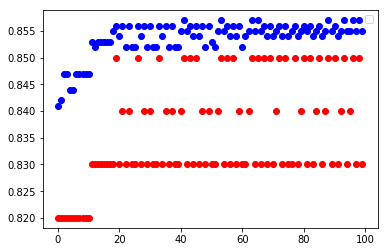

In [148]:
%matplotlib inline
plt.close('all')

for i,y in enumerate(acc):
    plt.plot(i, y[0],'ro',color='blue') #color= colors[test[2][i]])
    plt.plot(i, y[1],'ro',color='red')

In [150]:
#"Blau = Train, Rot = Test"

In [157]:
#!pip install keras
#!pip install tensorflow

In [163]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import SGD

import numpy as np
np.random.seed(123) #um die Gewichte immer gleich zufaellig zu initialisieren
from tensorflow import set_random_seed
set_random_seed(123) # um die Gewichte immer gleichzufaellig zu initialisieren

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
model = Sequential()
 
 
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
 
history = model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, validation_split=0.2,verbose=1)
 
score = model.evaluate(X_test, Y_test, verbose=1)
print '\n', 'test acc', score[1]

print history.history